<a href="https://colab.research.google.com/github/ryankillian/fables-data-notebooks/blob/main/KMeans_Motif_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
from google.colab import files
uploaded = files.upload()


Saving gpt.txt to gpt.txt


## Text Embeddings with TF-IDF:

Convert your motifs into a dataframe and then into TF-IDF vectors:

In [3]:
with open('gpt.txt', 'r') as f:
    motifs = f.readlines()

df = pd.DataFrame(motifs, columns=['motifs'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['motifs'])



## Understanding the TfidfVectorizer:
The TfidfVectorizer from sklearn is a tool that converts a collection of text documents (in our case, the motifs) into a matrix of token (word) counts. However, instead of just counting, it uses the Term Frequency-Inverse Document Frequency (TF-IDF) method.

Term Frequency (TF): This measures the frequency of a word in a document. TF is the number of times a word appears in a document divided by the total number of words in that document.

Inverse Document Frequency (IDF): This measures how significant a word is in the entire corpus (collection of documents). Words that are common in every document (like "and", "the", "is") have a low IDF. But words that are unique to a particular document have a high IDF.

When you multiply these two metrics (TF and IDF), you get a weight for each word in each document. Words that are common in every document will have a weight close to 0 (because the IDF will be low), but words that are unique to a particular document will have a higher weight.

This method is especially useful for text classification and clustering tasks, as it gives more importance to words that are more relevant in the dataset, while discarding frequent but irrelevant words.

## Why fit_transform?
The fit_transform method essentially combines two steps:

fit: This step learns the vocabulary from the provided text data. It determines the unique words (tokens) present and calculates the IDF for each word.
transform: This step uses the learned vocabulary to encode new text data into vectors. It calculates the TF for each word in the new text data based on the vocabulary learned in the fit step, then multiplies it by the previously learned IDF to obtain the TF-IDF representation.
In our case, we are both learning the vocabulary and transforming our data in a single step, so we use fit_transform. If we had new data in the future that we wanted to transform using the same vocabulary, we would just use the transform method on its own.

## Viewing the results of the vectorization:
You can transform the TF-IDF matrix into a dense format and view it as a dataframe:

In [ ]:
dense = X.todense()
tfidf_df = pd.DataFrame(dense, columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())


## Determine Optimal K:

Use the Elbow Method:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


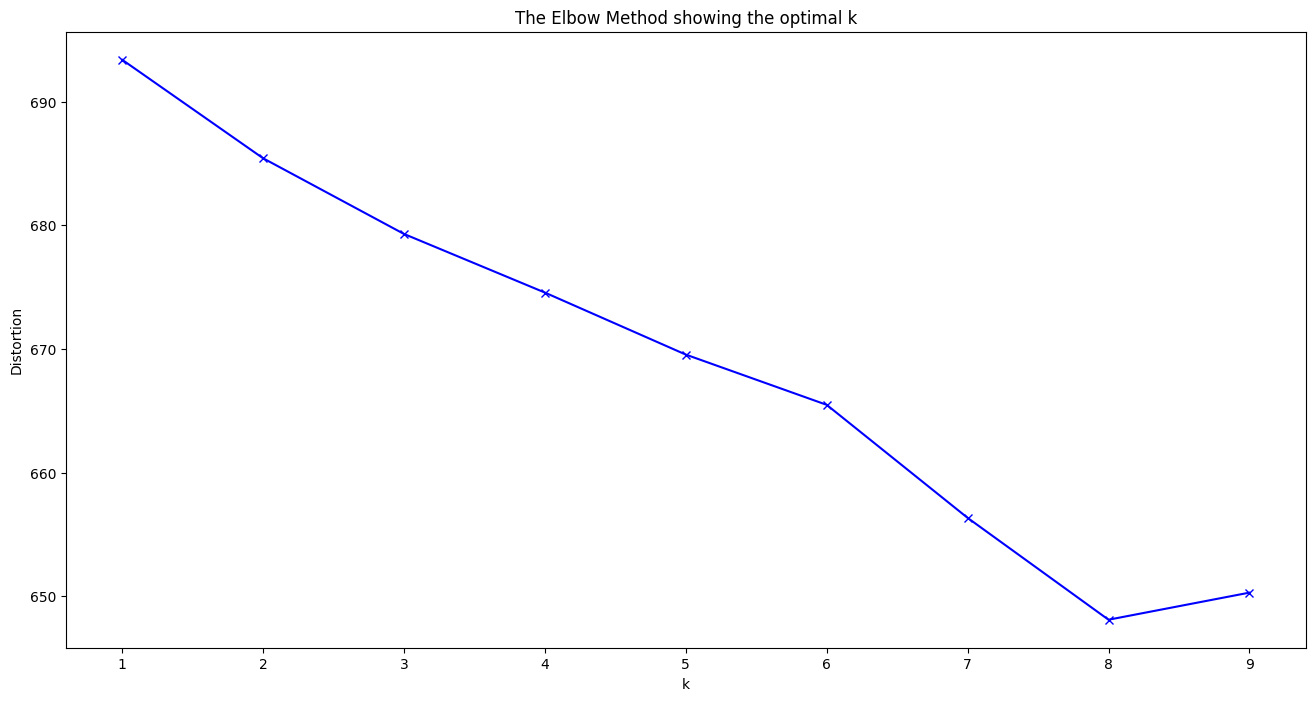

In [7]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


The value of 8 obtained from Step 4 indicates the optimal number of clusters (or topics) for the dataset according to the Elbow method.

Here's a breakdown:

1. **KMeans Clustering**: The KMeans algorithm groups data points into \( K \) clusters. The number \( K \) is a hyperparameter that needs to be specified in advance.
   
2. **Within-Cluster Sum of Squares (WCSS)**: For each value of \( K \), the algorithm computes the WCSS, which is the sum of squared distances between data points and their respective cluster centroids. Ideally, we want this sum to be as low as possible, indicating that data points are close to the centers of their clusters.

3. **Elbow Method**: As we increase \( K \), the WCSS tends to decrease (since more clusters mean data points are generally closer to centroids). However, after a certain point, the reduction in WCSS becomes marginal, indicating that adding more clusters doesn't provide much better fit to the data. This point, where the rate of decrease sharply changes, is called the "elbow".

In this case, the Elbow method suggested that 8 is the optimal number of clusters for our motifs. This means that, according to the data and the method, the motifs can be grouped into 8 distinct topics or categories, and this number of categories provides a balance between precision (fitting the data well) and generality (not having too many categories).

## Apply KMeans Clustering:

Based on the Elbow Method's visualization, choose an optimal K and cluster the motifs.
Visualize the clusters using PCA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


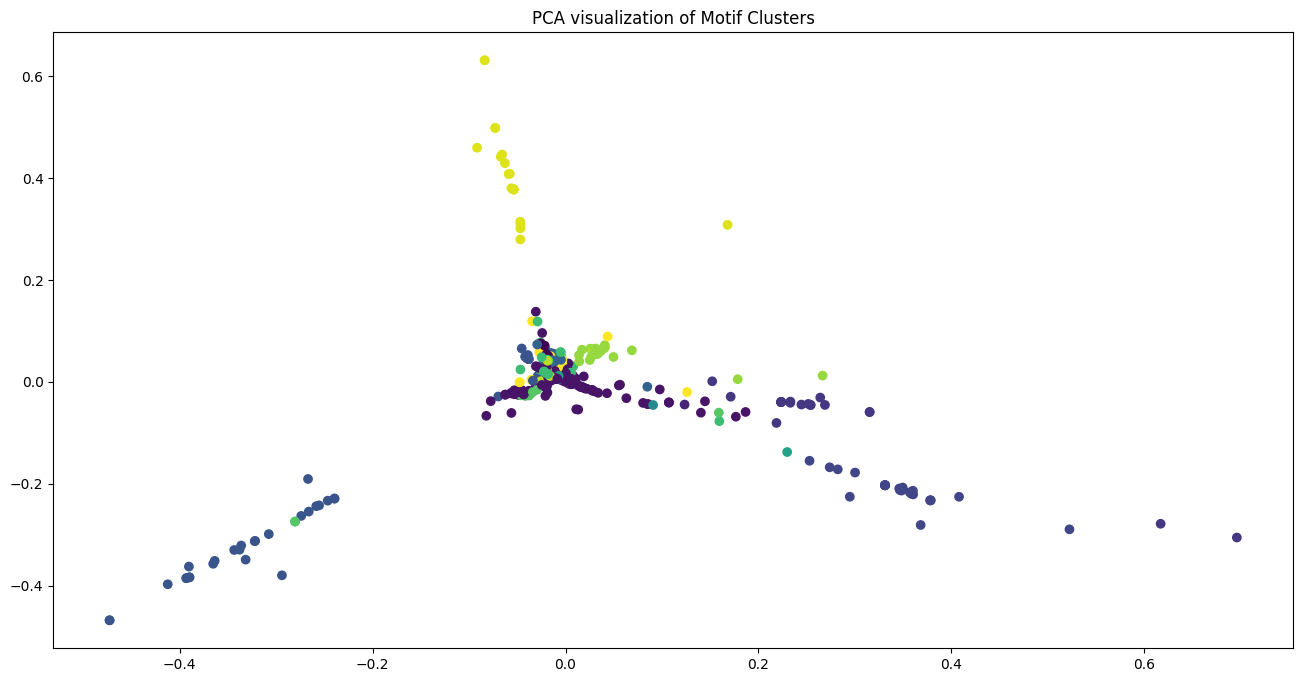

In [11]:
optimal_k = 20
kmeanModel = KMeans(n_clusters=optimal_k)
kmeanModel.fit(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X.toarray())
plt.figure(figsize=(16,8))
plt.scatter(result[:, 0], result[:, 1], c=kmeanModel.labels_)
plt.title('PCA visualization of Motif Clusters')
plt.show()


The PCA graph from Step 5 is mainly for visualization purposes and helps in understanding the distribution of the data points in the reduced dimensional space. It's useful for a visual check, but the actual cluster assignments in Step 6 are more crucial for our purpose.

## Assign Labels:

Print motifs from each cluster:

In [12]:
df['cluster'] = kmeanModel.labels_
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['motifs'].head(10))
    print("\n")


Cluster 0:
257       Importance of Early Intervention\n
258              Importance of Observation\n
259      Importance of Patience and Timing\n
260              Importance of Perspective\n
261           Importance of Reconciliation\n
386                               Patience\n
387               Patience and Frustration\n
388    Patience and Misplaced Expectations\n
389                  Patience and Strategy\n
589      The Importance of Inner Qualities\n
Name: motifs, dtype: object


Cluster 1:
0               Absurdity and Ironic Tragedy\n
4                             Accepting Loss\n
5                             Accountability\n
10                                Adaptation\n
11                   Adaptation and Survival\n
12    Adaptation of Predators or Adversaries\n
13        Adapting to Changing Circumstances\n
14                      Adaptive Preferences\n
15     Aesthetic Differences and Perceptions\n
16           Aesthetic Preference and Ageism\n
Name: motifs, dtype: object


In [13]:
# Define cluster labels based on the motifs they contain
cluster_labels = [
    "Timely Interventions",
    "Embracing Change",
    "Costs and Vengeance",
    "Perspectives & Insights",
    "Facing Consequences",
    "Dynamics of Power",
    "Realities & Interpretations",
    "Evolution & Flexibility",
    "Strength in Unity",
    "Duties & Obligations",
    "Choices & Judgments",
    "Pretenses & Deceit",
    "Recognizing Threats",
    "Dualities & Comparisons",
    "Natural Instincts",
    "Appreciation & Gratitude",
    "Self-Discovery & Identity",
    "Resilience in Adversity",
    "Valuing the Intangible",
    "Manipulation & Trust"
]

# Map the labels to the clusters and display
for i, label in enumerate(cluster_labels):
    print(f"Cluster {i} ({label}):")
    print(df[df['cluster'] == i]['motifs'].head(10))  # Displaying the top 10 motifs for brevity
    print("\n")


Cluster 0 (Timely Interventions):
257       Importance of Early Intervention\n
258              Importance of Observation\n
259      Importance of Patience and Timing\n
260              Importance of Perspective\n
261           Importance of Reconciliation\n
386                               Patience\n
387               Patience and Frustration\n
388    Patience and Misplaced Expectations\n
389                  Patience and Strategy\n
589      The Importance of Inner Qualities\n
Name: motifs, dtype: object


Cluster 1 (Embracing Change):
0               Absurdity and Ironic Tragedy\n
4                             Accepting Loss\n
5                             Accountability\n
10                                Adaptation\n
11                   Adaptation and Survival\n
12    Adaptation of Predators or Adversaries\n
13        Adapting to Changing Circumstances\n
14                      Adaptive Preferences\n
15     Aesthetic Differences and Perceptions\n
16           Aesthetic Preference

## Export Results:

After manually assigning labels to each cluster, map the motifs to their labels and save the results:

In [16]:
# Create a dictionary mapping cluster numbers to their labels
cluster_to_label = {i: label for i, label in enumerate(cluster_labels)}

# Remove unwanted line breaks from the 'motifs' column
df['motifs'] = df['motifs'].str.strip()

# Map the cluster numbers in the 'cluster' column to their corresponding labels
df['label'] = df['cluster'].map(cluster_to_label)

# Save the dataframe to a CSV and download it
df[['motifs', 'label']].to_csv('mapped_motifs.csv', index=False)
files.download('mapped_motifs.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's start by examining the distribution of the general motifs (cluster labels) among the fine-grained motifs. This will provide insight into whether the clustering is balanced or if there are some general motifs dominating the distribution.


Here's the distribution of the general motifs:

- **Embracing Change**: 407
- **Dynamics of Power**: 42
- **Dualities & Comparisons**: 40
- **Facing Consequences**: 25
- **Self-Discovery & Identity**: 22
- **Valuing the Intangible**: 21
- **Perspectives & Insights**: 20
- **Manipulation & Trust**: 17
- **Realities & Interpretations**: 17
- **Costs and Vengeance**: 14
- **Resilience in Adversity**: 11
- **Natural Instincts**: 11
- **Pretenses & Deceit**: 10
- **Timely Interventions**: 10
- **Duties & Obligations**: 9
- **Recognizing Threats**: 8
- **Appreciation & Gratitude**: 5
- **Choices & Judgments**: 4
- **Evolution & Flexibility**: 3
- **Strength in Unity**: 3

From the distribution, it's evident that "Embracing Change" is overwhelmingly dominant, representing 407 out of the 700 fine-grained motifs. This could be indicative of a few issues:

1. **Insufficient Variation in the Fine-grained Motifs**: If the fine-grained motifs are too similar, the clustering algorithm might place them into the same cluster. This could result from the embeddings being too similar for a significant portion of the motifs.
  
2. **PCA and K-Means Limitations**: The combination of PCA for dimensionality reduction followed by K-means clustering might not be capturing the nuances of the fine-grained motifs effectively.

3. **Parameter Selection**: The number of clusters chosen might not be optimal. The elbow method provides a heuristic, but it's not always perfect. There might be a need for more or fewer clusters.

4. **Nature of the Textual Data**: It's possible that the textual data in the fine-grained motifs is inherently biased towards certain themes. However, this seems less likely given the wide range of motifs.

**Recommendations**:
1. **Different Clustering Technique**: Instead of K-means, more advanced clustering techniques such as DBSCAN, hierarchical clustering, or spectral clustering could be explored.
2. **Deep Learning Embeddings**: Instead of TF-IDF, embeddings from models like Word2Vec, FastText, or even more advanced models like BERT could be used.
3. **Manual Review**: It might be helpful to manually review some of the fine-grained motifs that fall under "Embracing Change" to understand why they are being grouped together.

Would you like to explore any of these recommendations, or would you like to discuss any other aspect of the result?